# KELT-20: CHEOPS occultations

## Data download

In [1]:
import CONAN
CONAN.__version__

'3.3.0'

In [2]:
from CONAN.get_files import get_CHEOPS_data
df = get_CHEOPS_data("KELT-20")
df.search( filters = { "pi_name"         : {"contains":["LENDL"]}, 
                       "data_arch_rev"   : {"equal":[3]},
                       "status_published": {"equal":[True]}
                     })

  obj_id_catname                    file_key       pi_name  date_mjd_start  \
0        KELT-20  CH_PR100016_TG014101_V0300  Monika LENDL    59390.531256   
1        KELT-20  CH_PR100016_TG014102_V0300  Monika LENDL    59407.951403   
2        KELT-20  CH_PR100016_TG014103_V0300  Monika LENDL    59425.294447   
3        KELT-20  CH_PR100016_TG014104_V0300  Monika LENDL    59439.168753   
4        KELT-20  CH_PR100016_TG014105_V0300  Monika LENDL    59762.250712   
5        KELT-20  CH_PR100016_TG014106_V0300  Monika LENDL    59776.167371   
6        KELT-20  CH_PR100016_TG014107_V0300  Monika LENDL    59800.485426   

  obs_total_exptime  data_arch_rev  status_published  
0              36.0              3              True  
1              36.0              3              True  
2              36.0              3              True  
3              36.0              3              True  
4              36.0              3              True  
5              36.0              3           

download the first 4 occultation light curves

downloaded lightcurve with file key: CH_PR100016_TG014101_V0300, aperture: DEFAULT

Rejected 6 points more than 4.0 x MAD = 454 ppm from the median
downloaded lightcurve with file key: CH_PR100016_TG014102_V0300, aperture: DEFAULT

Rejected 9 points more than 4.0 x MAD = 464 ppm from the median
downloaded lightcurve with file key: CH_PR100016_TG014103_V0300, aperture: DEFAULT

Rejected 9 points more than 4.0 x MAD = 454 ppm from the median
downloaded lightcurve with file key: CH_PR100016_TG014104_V0300, aperture: DEFAULT

Rejected 12 points more than 4.0 x MAD = 493 ppm from the median


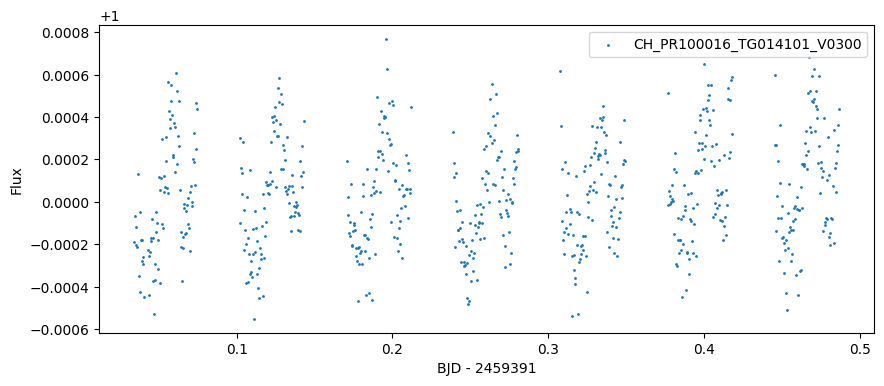

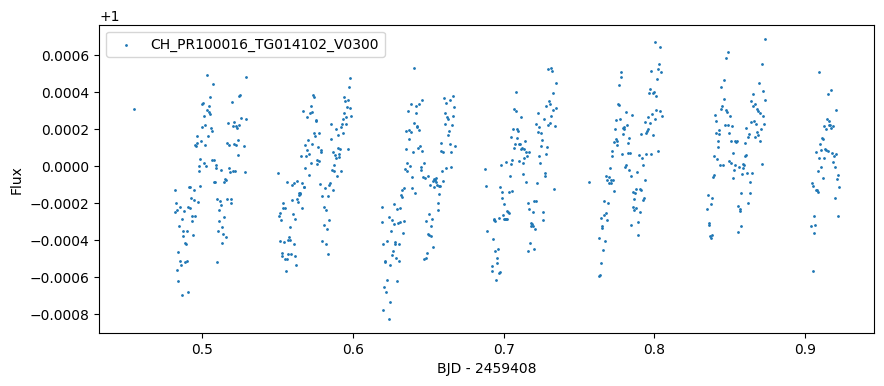

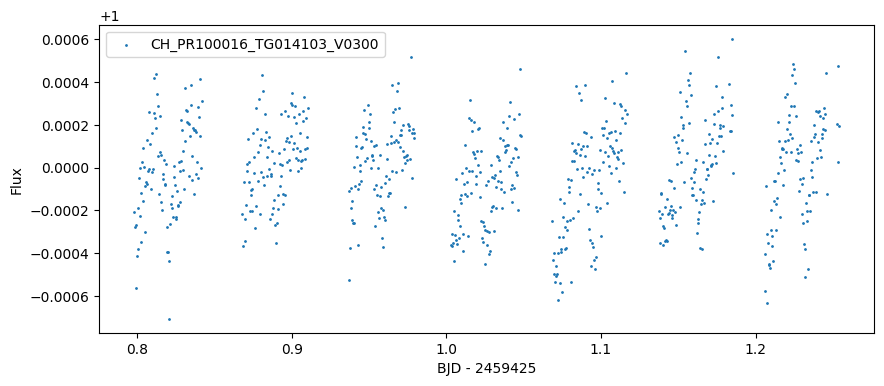

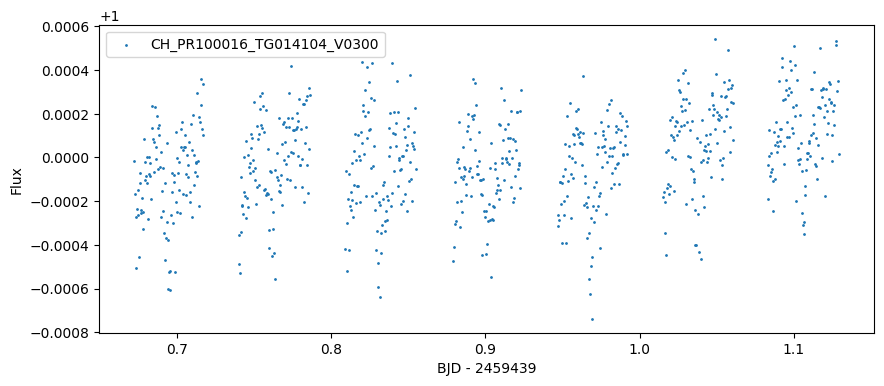

columns are ordered as [0:time, 1:flux, 2:flux_err, 3:x_off, 4:y_off, 5:roll, 6:bg, 7:contam, 8:deltaT]
saved file as data/KELT-20_014101.dat
columns are ordered as [0:time, 1:flux, 2:flux_err, 3:x_off, 4:y_off, 5:roll, 6:bg, 7:contam, 8:deltaT]
saved file as data/KELT-20_014102.dat
columns are ordered as [0:time, 1:flux, 2:flux_err, 3:x_off, 4:y_off, 5:roll, 6:bg, 7:contam, 8:deltaT]
saved file as data/KELT-20_014103.dat
columns are ordered as [0:time, 1:flux, 2:flux_err, 3:x_off, 4:y_off, 5:roll, 6:bg, 7:contam, 8:deltaT]
saved file as data/KELT-20_014104.dat


In [3]:
df.download(file_keys=df.file_keys[:4], aperture="DEFAULT")
df.scatter()
df.save_CONAN_lcfile(bjd_ref = 2457000, folder="data")

# Data Analysis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from os.path import basename
from copy import deepcopy

import CONAN
CONAN.__version__

'3.3.0'

In [3]:
path    = "data/"
lcs     = sorted(glob(f"{path}KELT-20*"))#, key=os.path.getmtime)
lc_list = [basename(lc) for lc in lcs][:3]

In order to derive different occultation depths for the observations, we will set different filters for the lightcurves while loading them

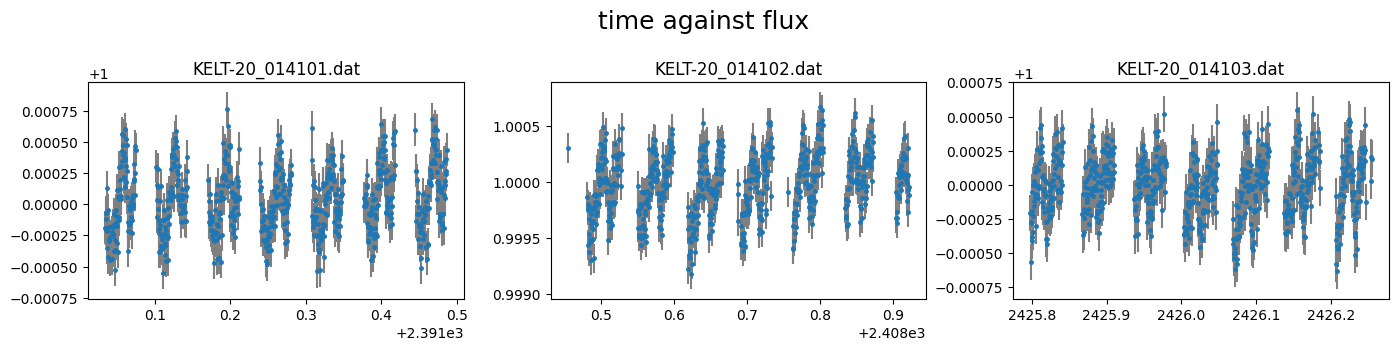

# ============ Input lightcurves, filters baseline function =======================================================
name               flt 𝜆_𝜇m |Ssmp ClipOutliers scl_col |off col0 col3 col4 col5 col6 col7 col8|sin id GP spline         
KELT-20_014101.dat CH1 0.1  |None c1:W11C4n1   med_sub |  y    0    0    0    0    0    0    0|n    1 n  None           
KELT-20_014102.dat CH2 0.2  |None c1:W11C4n1   med_sub |  y    0    0    0    0    0    0    0|n    2 n  None           
KELT-20_014103.dat CH3 0.3  |None c1:W11C4n1   med_sub |  y    0    0    0    0    0    0    0|n    3 n  None           


lightcurves from filepath: data/
1 transiting planet(s)
Order of unique filters: ['CH1', 'CH2', 'CH3']

In [13]:
lc_obj = CONAN.load_lightcurves(   file_list     = lc_list, 
                                    data_filepath = path, 
                                    filters       = [f"CH{i+1}" for i in range(len(lc_list))],
                                )

lc_obj.clip_outliers(width=11, clip=4, verbose=False)
lc_obj.rescale_data_columns(method = "med_sub", verbose=False)
lc_obj.plot()
lc_obj

setup planet parameters with the occultation depth ``D_occ`` as the only varying one

In [14]:
lc_obj.planet_parameters(   T_0          = 2459406.927174 - 2457000,      
                            Period       = 3.474074 ,          
                            Impact_para  = 0.515,      
                            RpRs         = 0.11572, 
                            Duration     = 0.13998861,
                        )

lc_obj.phasecurve(  D_occ = (-100,0,300))

# ============ Planet parameters (Transit and RV) setup ========================================================== 
name                	fit 	prior                              	note
rho_star/[Duration] 	n   	F(0.13998861)                      	#choice in []|unit(gcm^-3/days)
--------repeat this line & params below for multisystem, adding '_planet_number' to the names e.g RpRs_1 for planet 1, ...
RpRs                	n   	F(0.11572)                         	#range[-0.5,0.5]
Impact_para         	n   	F(0.515)                           	#range[0,2]
T_0                 	n   	F(2406.9271740000695)              	#unit(days)
Period              	n   	F(3.474074)                        	#range[0,inf]days
Eccentricity        	n   	F(0)                               	#range[0,1]
omega               	n   	F(90)                              	#range[0,360]deg
K                   	n   	F(0)                               	#unit(same as RVdata)
CH1: modeling only occultation signal
CH2: modeling only

Notice the strong systematics in the `CHEOPS` lightcurves. they are mostly due to to correlation with the spacecraft roll angle (which is stored in column 5 of the data). we can visualize this correlation by plotting column 5 against the flux

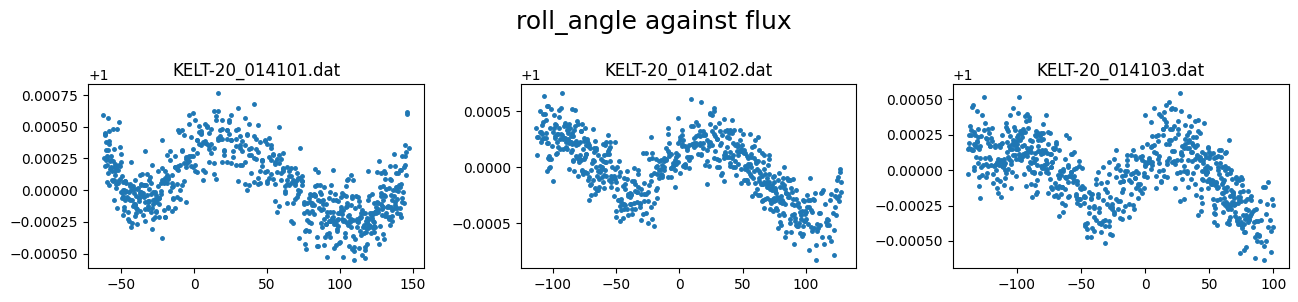

In [15]:
lc_obj.plot(plot_cols=(5,1), col_labels=("roll_angle","flux"), figsize= (13,3))

Different methods can be used to decorrelate the flux from the roll-angle. Here will try three methods:
- fit Spline as a function of the roll-angle 
- fit a combination of sines and cosines of the roll-angle (and the harmonics). 
- fit a GP as a function of roll-angle


if plotted together, the roll angle trend of these visits aligns nicely. For the sinusoid and GP fit, we will be able to fit the same roll-angle trend to the 3 visits

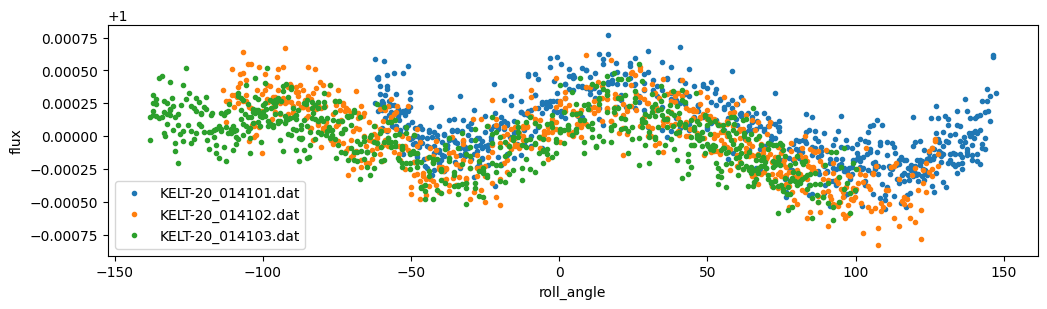

In [16]:
plt.figure(figsize=(12,3))
for lc in lc_obj._input_lc.keys():
    plt.plot(lc_obj._input_lc[lc]["col5"], lc_obj._input_lc[lc]["col1"],".", label=lc)
plt.legend()
plt.xlabel("roll_angle")
plt.ylabel("flux");

Besides the roll-angle trend, the flux can be correlated with other ancillary data. we can use the ``get_decorr()`` method to automatically find other significant correlations. But here we will manually select the column of the data to decorrelate against. Let's use  ``col7`` (contam) and ``col8`` (delta_T)

In [17]:
lc_obj.lc_baseline(dcol7=1, dcol8=1)

# ============ Input lightcurves, filters baseline function =======================================================
name               flt 𝜆_𝜇m |Ssmp ClipOutliers scl_col |off col0 col3 col4 col5 col6 col7 col8|sin id GP spline         
KELT-20_014101.dat CH1 0.1  |None c1:W11C4n1   med_sub |  y    0    0    0    0    0    1    1|n    1 n  None           
KELT-20_014102.dat CH2 0.2  |None c1:W11C4n1   med_sub |  y    0    0    0    0    0    1    1|n    2 n  None           
KELT-20_014103.dat CH3 0.3  |None c1:W11C4n1   med_sub |  y    0    0    0    0    0    1    1|n    3 n  None           


### Roll-angle spline fit 

In [18]:
#create a copy of the light curve object on which we will use the splines
lcobj_spl = deepcopy(lc_obj)

lcobj_spl.add_spline(lc_list="all", par="col5", degree=3, knot_spacing=50 )



# ============ Input lightcurves, filters baseline function =======================================================
name               flt 𝜆_𝜇m |Ssmp ClipOutliers scl_col |off col0 col3 col4 col5 col6 col7 col8|sin id GP spline         
KELT-20_014101.dat CH1 0.1  |None c1:W11C4n1   med_sub |  n    0    0    0    0    0    1    1|n    1 n  c5:d3k50       
KELT-20_014102.dat CH2 0.2  |None c1:W11C4n1   med_sub |  n    0    0    0    0    0    1    1|n    2 n  c5:d3k50       
KELT-20_014103.dat CH3 0.3  |None c1:W11C4n1   med_sub |  n    0    0    0    0    0    1    1|n    3 n  c5:d3k50       


In [19]:
fit_obj = CONAN.fit_setup(R_st=(1.617,0.05), verbose=False)
fit_obj.sampling(sampler="dynesty",n_cpus=10, n_live=200,verbose=False)

result_spl = CONAN.run_fit(lcobj_spl, None, fit_obj, 
                            out_folder="result_KELT20_spl")

Fit result already exists in this folder: result_KELT20_spl.
 Loading results...
['lc'] Output files, ['KELT-20_014101_lcout.dat', 'KELT-20_014102_lcout.dat', 'KELT-20_014103_lcout.dat'], loaded into result object
['rv'] Output files, [], loaded into result object


## Roll-angle Sinusoid fit  

In [20]:
lcobj_sin = deepcopy(lc_obj)

#set trig='sincos' to use an addition of sin and cos in roll-angle upto order n. Amplitudes are in ppm
lcobj_sin.add_sinusoid( lc_list = "same",
                        trig    = "sincos",
                        n       = 3,
                        par     = "col5",
                        Amp     = (-2000,0,2000),P=360
                        )

fitting same sinusoid to all LCs.
# ============ Input lightcurves, filters baseline function =======================================================
name               flt 𝜆_𝜇m |Ssmp ClipOutliers scl_col |off col0 col3 col4 col5 col6 col7 col8|sin id GP spline         
KELT-20_014101.dat CH1 0.1  |None c1:W11C4n1   med_sub |  y    0    0    0    0    0    1    1|y    1 n  None           
KELT-20_014102.dat CH2 0.2  |None c1:W11C4n1   med_sub |  y    0    0    0    0    0    1    1|y    2 n  None           
KELT-20_014103.dat CH3 0.3  |None c1:W11C4n1   med_sub |  y    0    0    0    0    0    1    1|y    3 n  None           
# ============ Sinusoidal signals: Amp*trig(2𝜋/P*(x-x0)) - trig=sin or cos or both added==========================
name/filt          trig     n_harmonics  x     Amp[ppm]            P                   x0                
same               sincos             3  col5  U(-2000,0,2000)     F(360)              F(0)              


In [21]:
fit_obj = CONAN.fit_setup(R_st=(1.617,0.05), verbose=False)
fit_obj.sampling(sampler="dynesty",n_cpus=10, n_live=200,verbose=False)

result_spl = CONAN.run_fit(lcobj_sin, None, fit_obj, 
                            out_folder="result_KELT20_sin")

Fit result already exists in this folder: result_KELT20_sin.
 Loading results...
['lc'] Output files, ['KELT-20_014101_lcout.dat', 'KELT-20_014102_lcout.dat', 'KELT-20_014103_lcout.dat'], loaded into result object
['rv'] Output files, [], loaded into result object


## Roll-angle GP fit

In [27]:
lcobj_gp = lc_obj

In [28]:
lcobj_gp.add_GP(lc_list     = "same",            # same GP to be used to model all visits
                par         = "col5",           # independent variable for the GP
                kernel      = "mat32",          # kernel to use
                amplitude   = (10,146,700),     # ppm
                lengthscale = (10, 45, 100),     # in unit of col5 (degrees)
                gp_pck      = ["ce","ce","ce"]
                )       


# ============ Input lightcurves, filters baseline function =======================================================
name               flt 𝜆_𝜇m |Ssmp ClipOutliers scl_col |off col0 col3 col4 col5 col6 col7 col8|sin id GP spline         
KELT-20_014101.dat CH1 0.1  |None c1:W11C4n1   med_sub |  n    0    0    0    0    0    1    1|n    1 ce None           
KELT-20_014102.dat CH2 0.2  |None c1:W11C4n1   med_sub |  n    0    0    0    0    0    1    1|n    2 ce None           
KELT-20_014103.dat CH3 0.3  |None c1:W11C4n1   med_sub |  n    0    0    0    0    0    1    1|n    3 ce None           
# ============ Photometry GP properties ===========================================================================
name               par1 kern1 Amplitude1_ppm     length_scale      |op| par2 kern2 Amplitude2_ppm     length_scale2    
same               col5 mat32 LU(10,146,700)     LU(10,45,100)     |--| None None  None               None              


In [29]:
fit_obj = CONAN.fit_setup(R_st=(1.617,0.05), verbose=False)
fit_obj.sampling(sampler="dynesty",n_cpus=10, n_live=200,verbose=False)

result_spl = CONAN.run_fit(lcobj_gp, None, fit_obj, 
                            out_folder="result_KELT20_gp")

Fit result already exists in this folder: result_KELT20_gp.
 Loading results...
['lc'] Output files, ['KELT-20_014101_lcout.dat', 'KELT-20_014102_lcout.dat', 'KELT-20_014103_lcout.dat'], loaded into result object
['rv'] Output files, [], loaded into result object


# Compare results 

In [22]:
from CONAN import compare_results
# load all results for comparison
comp = compare_results(["result_KELT20_spl", "result_KELT20_sin", "result_KELT20_gp"])

['lc'] Output files, ['KELT-20_014101_lcout.dat', 'KELT-20_014102_lcout.dat', 'KELT-20_014103_lcout.dat'], loaded into result object
['rv'] Output files, [], loaded into result object
['lc'] Output files, ['KELT-20_014101_lcout.dat', 'KELT-20_014102_lcout.dat', 'KELT-20_014103_lcout.dat'], loaded into result object
['rv'] Output files, [], loaded into result object
['lc'] Output files, ['KELT-20_014101_lcout.dat', 'KELT-20_014102_lcout.dat', 'KELT-20_014103_lcout.dat'], loaded into result object
['rv'] Output files, [], loaded into result object


### corner plot of selected parameters for the 3 results

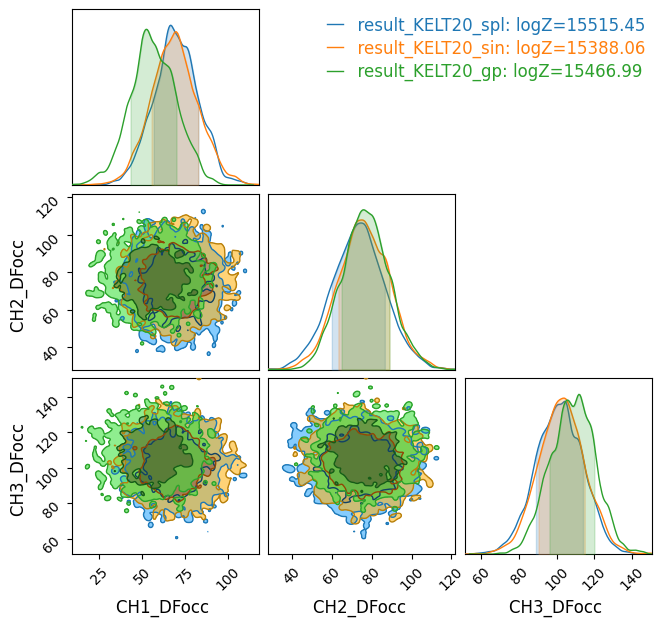

In [23]:
occ_pars = ['CH1_DFocc','CH2_DFocc','CH3_DFocc']   #occultation depth of the 3 visits
comp.plot_distributions(pars = occ_pars, figsize=(7,7));

Notice that the evidence for each model fit is also shows and thus useful for comparison.  In this case, the spline model has the highest evidence.

### plot the fit of the raw data, including the systematic and occultation model

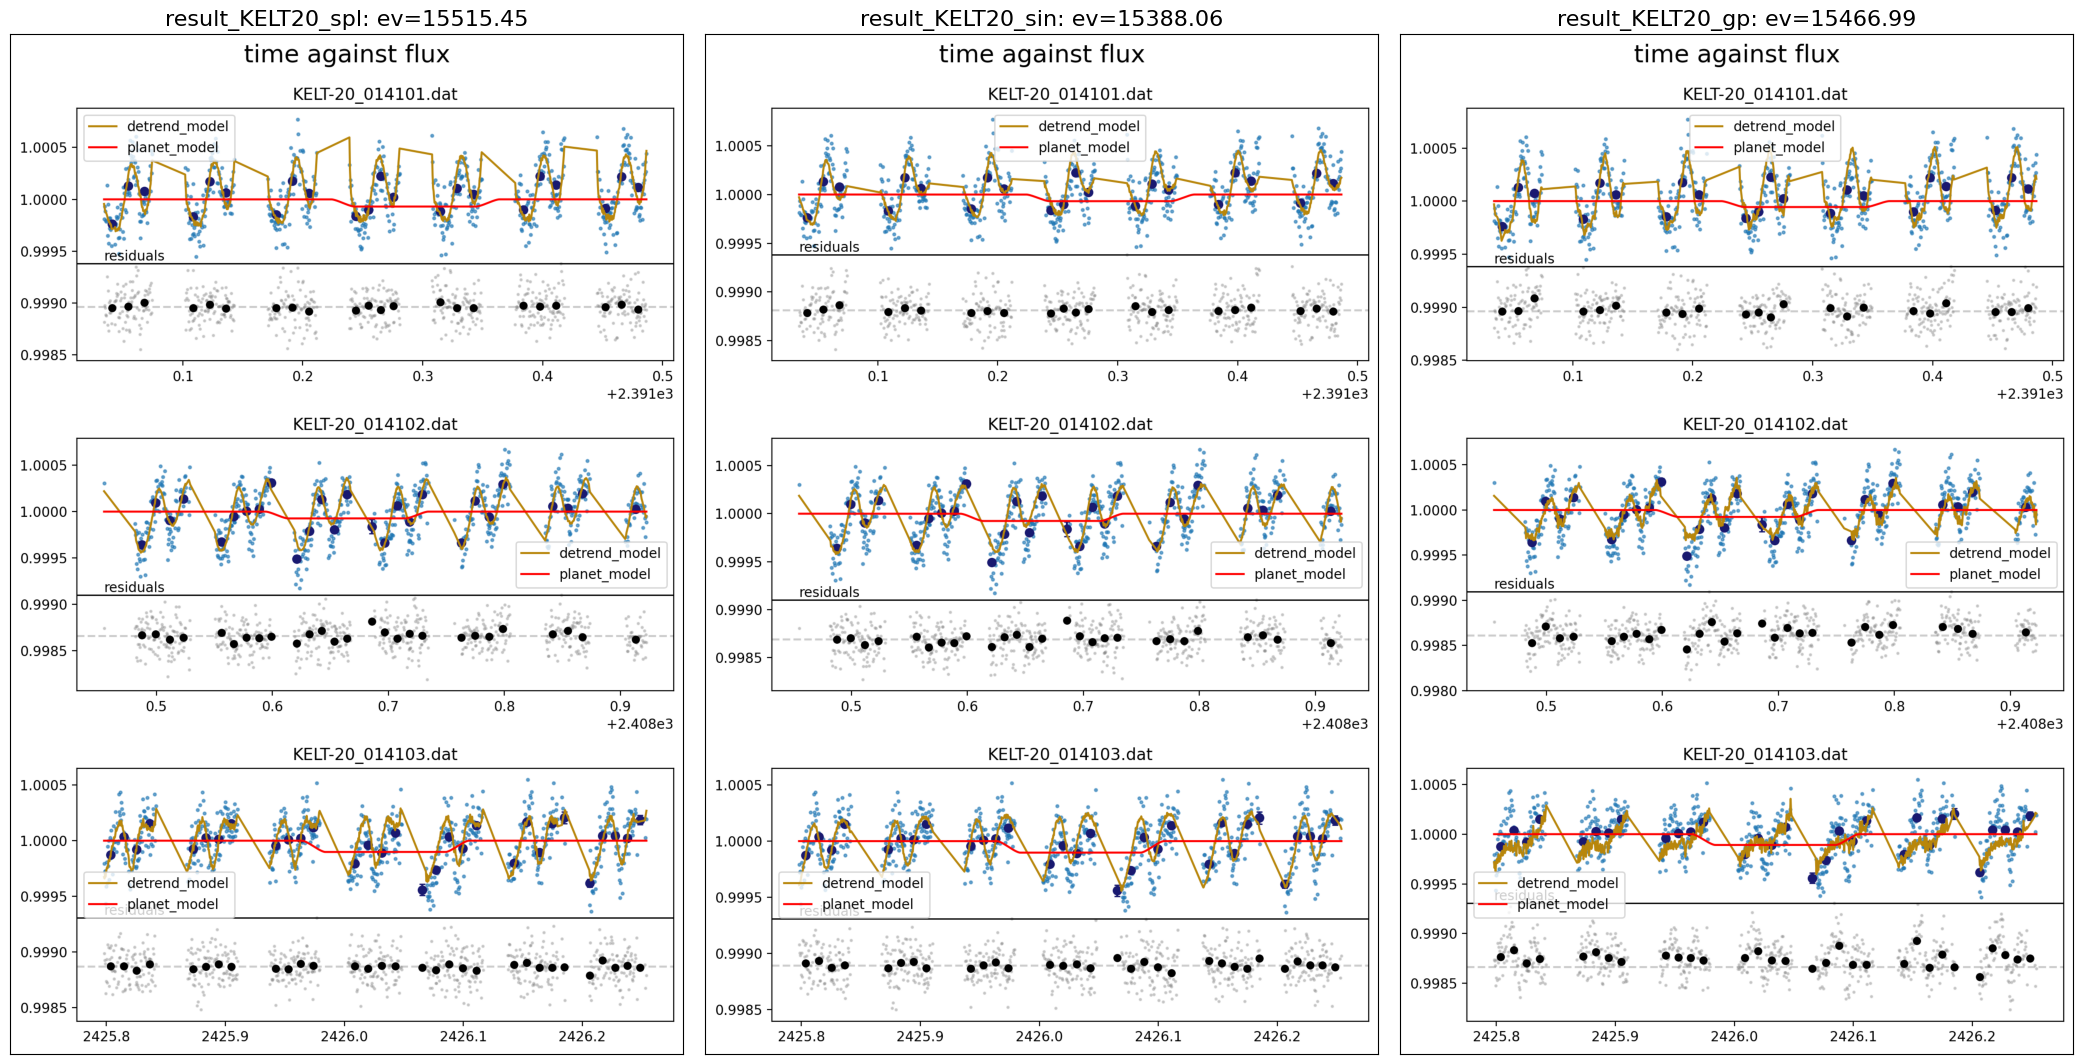

In [24]:
comp.plot_lc();

Let's visualize how well the different methods model the roll-angle trend

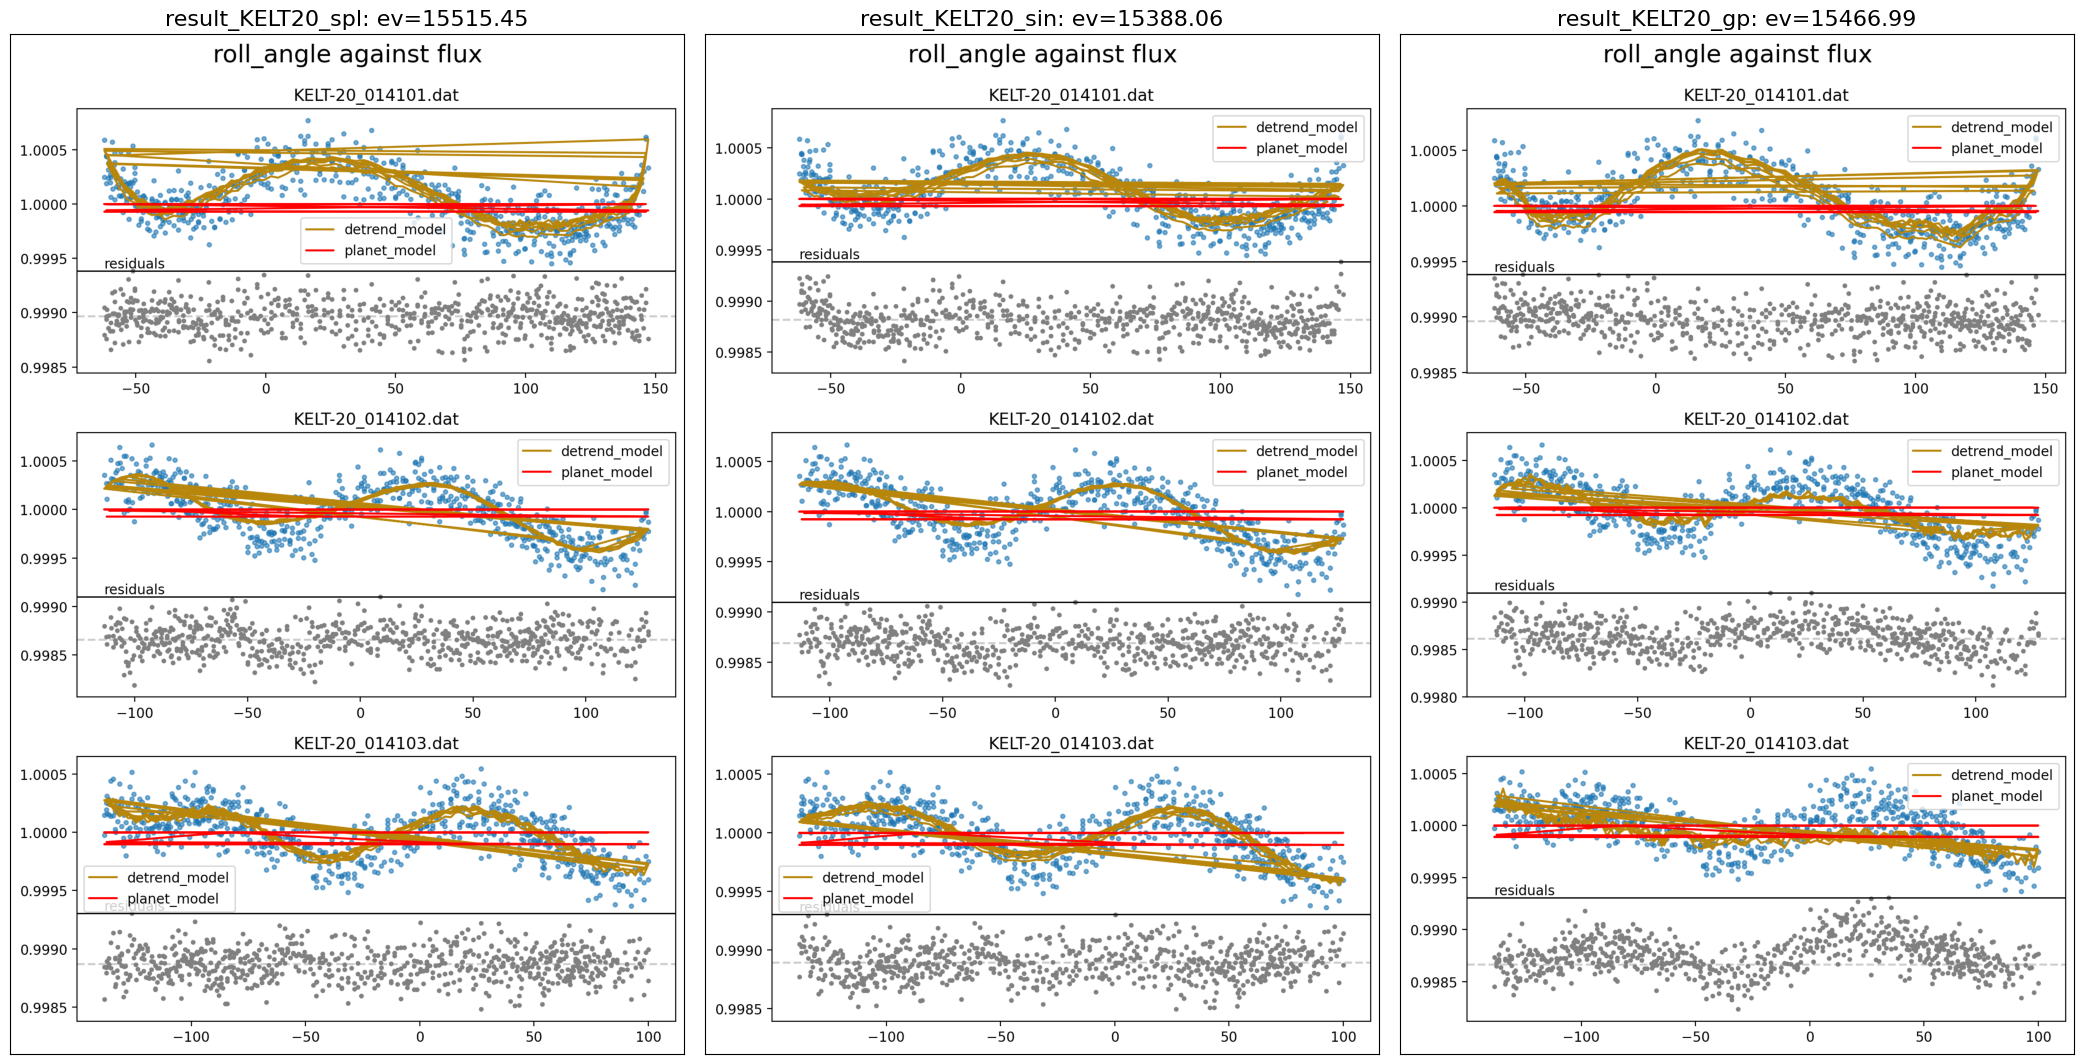

In [25]:
comp.plot_lc(plot_cols=(5,1), col_labels=("roll_angle","flux"));

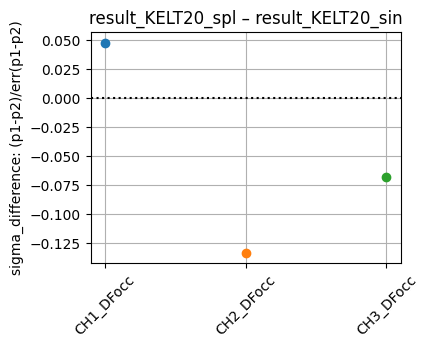

In [26]:
comp.plot_param_sigma_diff(pars = occ_pars, res_index=[0,1], figsize=(4,3));

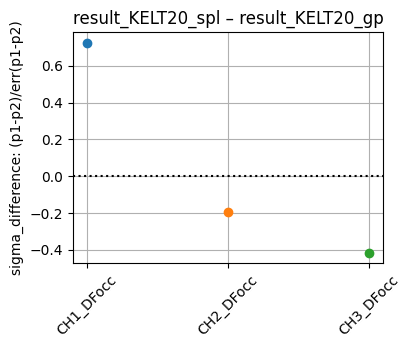

In [20]:
comp.plot_param_sigma_diff(pars = occ_pars, res_index=[0,2], figsize=(4,3));

comparing the results, the occultation depths  for each visit are less than 1 sigma apart